# 4-1 수업 내용
- AI Workflow란?
- Langchain이란?
- Langchain으로 구현하는 RAG
- Langchain으로 구현하는 AI Agent

# 1. AI Workflow

- AI Workflow 라는 말 들어보셨을까요?
  - 코딩없이 자동화 프로그램을 만드는 "노코드" 프로그램들이 있습니다.
  - 아래 그림처럼 마우스로 배치하고, 연결하면 하나의 자동화프로그램이 완성됩니다.

<br/>

- 아래 그림을 보시면 됩니다.
  - 참고로 아래툴은 make 라는 툴입니다. (make.com)

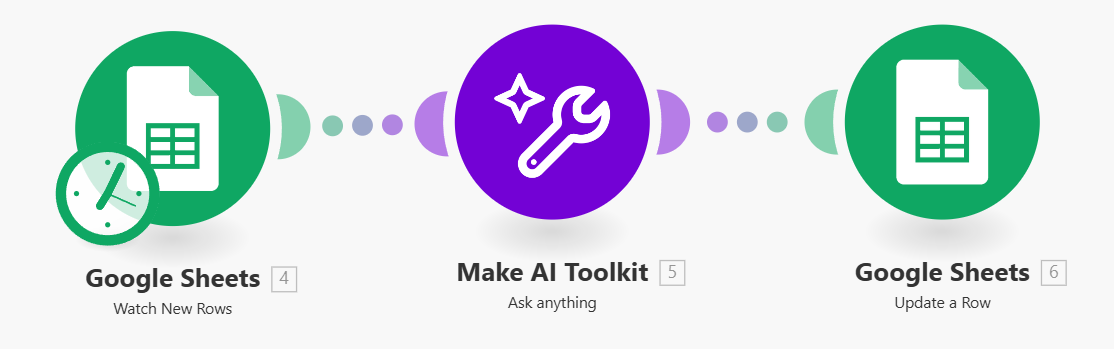

- 이렇게 동작됩니다.
  1. Google Sheet에 새로운 행이 생기면
  2. AI에게 데이터가 전달되고, 세팅된 프롬프트가 LLM에 자동 입력됩니다.
  3. LLM 이 만든 문장을 다시 Google Sheet에 적습니다.

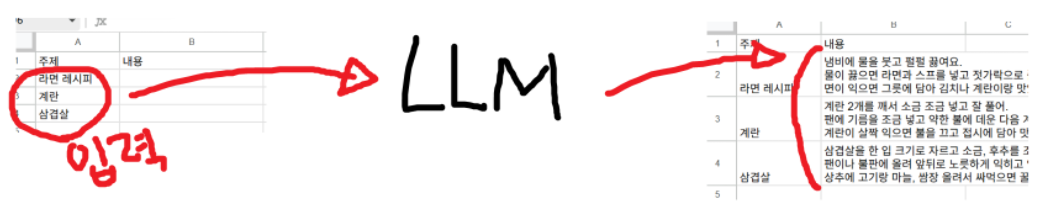

- 이렇게 동작이 되는 것이죠.
- 이렇게 입력 데이터가, 어디를 거치고, 또 어디를 거치고, AI도 거치고 하여, 출력을 내는 것 까지
- 이 데이터 처리 Flow를 만드는 것을 AI Workflow 라고 합니다.

<br/>

사무업무 자동화 툴로, 사무직 분들에게 인기가 많아요.
  - 반복적인 엑셀작업을 AI가 자동으로 초안을 작성하게 만들 수 있어요.
  - 영수증을 업로드하면 엑셀에 날짜, 시간, 가격 등 촥촥촥 정리되는 툴을 만들 수 있어요.
  - 긴급한 메일이 오면, AI가 내용을 요약하여 내 개인 SNS로 전송되게 만들 수 있어요.

<br/>

- 아래는 그림은 다음과 같은 Workflow를 갖는것 같이 보여요.
  1. 뉴스에 신규 기사가 뜨자마자
  2. 내용을 요약하고
  3. 중요한 Text만 파싱하고
  4. 트위터, 페이스북에 전송하고,
  5. 관련 그림을 만들어서 링크드인에 이미지와 글을 올린다.

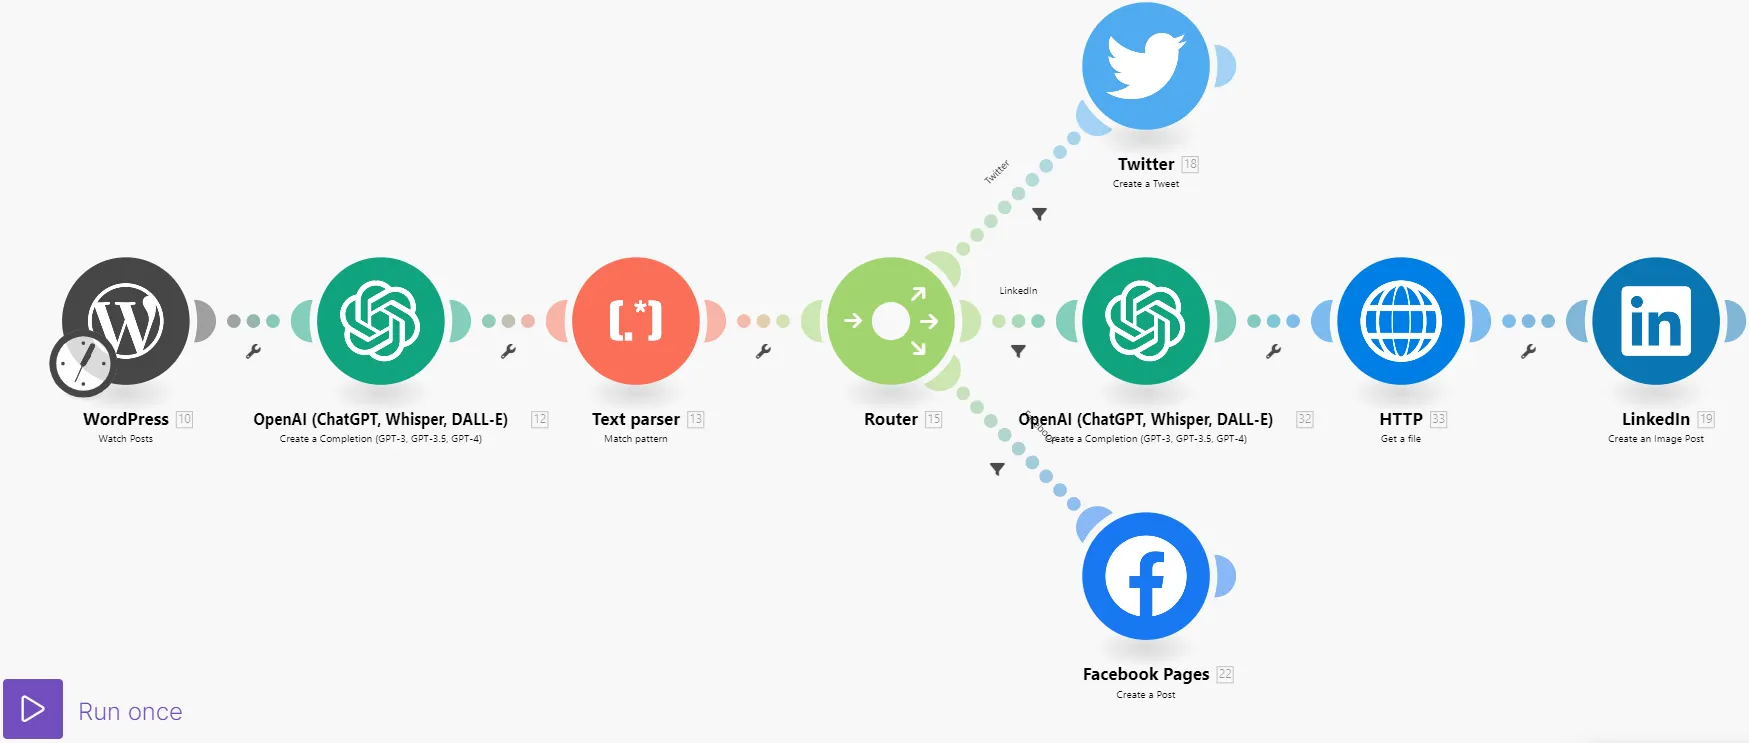

- AI Workflow가 무엇인지 이해하셨을 겁니다.

# 2. Langchain 은 무엇일까요?
- 노코드가 아니라, 코딩해서 만드는 AI Workflow 툴입니다.
- 우리의 첫 AI Workflow 제작을 위해 먼저 LLM 준비를 하겠습니다.
  - 아래와 같이 OpenAI Key를 세팅해주세요.

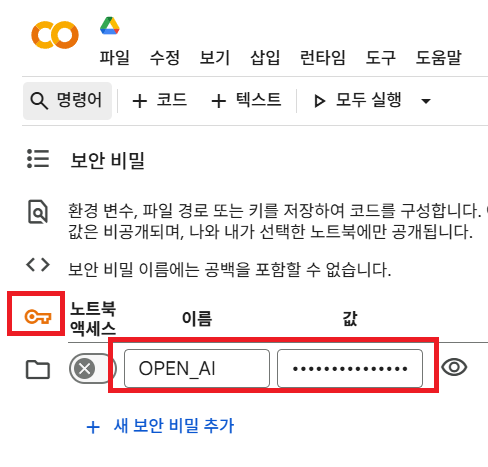


- 랭체인을 설치합시다.
  - langchain-openai 는 랭체인에서 openai를 사용할 수 있도록 만들어진 패키지입니다.

In [ ]:
!pip install langchain langchain-openai

- 아래와 같이 AI Workflow를 갖는 코드를 작성해보겠습니다.
  - 1. Prompt : 프롬프트를 입력
  - 2. LLM : LLM이 프롬프트를 전달 받아 처리
  - 3. String : LLM 출력결과를 정리

- 각 단계를 Langchain에서는 **Component** 라고 합니다.

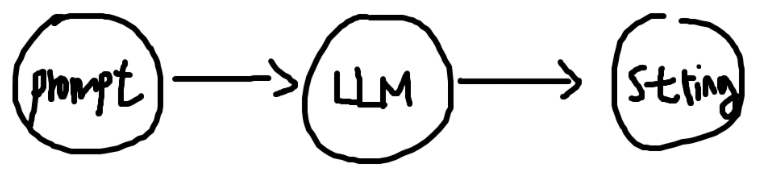

In [ ]:
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

key = userdata.get('OPEN_AI')

# Component 준비 (Workflow의 각 구성요소)
prompt = ChatPromptTemplate.from_template("넌 최고의 미식가야. 다음 질문에 대답해줘 <질문> : {input}")
llm = ChatOpenAI(model="gpt-4o-mini", api_key=key)
output_parser = StrOutputParser()

# 체인 구성 (prompt --> llm --> output_parser)
chain = prompt | llm | output_parser

# 체인 수행!!
response = chain.invoke({"input": "가장 맛있는 햄버거 브랜드는 무엇일까? 10글자 이내로 말해줘"})

print(response)


- 마우스를 드래그해서 연결했던 것과 동일하게 느껴집니다~.

# 4. ChatPromptTemplate 살펴보기
- 위 샘플코드에 있었던 ChatPromptTemplate 에 대해 살펴봅니다.

### OpenAI API의 기본 입력 포맷


- OpenAI는 다음과 같은 포맷으로 입력을 받습니다.
```
[
  {
    "role": "system",
     "content": "너는 친절한 AI야."
  },
]
```
- 여기서 role에는 다음 내용을 넣습니다.
  - system : 모델의 역할을 지정합니다.
    - 예시 : 넌 매우 밝고 친근한 맥도날드 점원이지
  - user : 사람이 입력한 질문 입니다.
    - 예시 : 가장 맛있는 버거 추천해줘
  - assistant : LLM이 생성한 응답입니다.
    - 예시 : 빅맥!
- OpenAI는 위와 같은 포맷을 사용합니다.


### ChatPromptTemplate의 **from_template**
- LLM 에게 보낼 프롬프트를 만드는 서식(Template)입니다.
  - 기본 값으로 role="user"로 변환됩니다.




In [ ]:
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

key = userdata.get('OPEN_AI')

# Component 준비 (Workflow의 각 구성요소)
prompt = ChatPromptTemplate.from_template("내 달리기 속도는 {num1}m를 달리는데, {num2}초 걸려. 빠른 편이니?, 한 문장으로 이쁘게 말해봐")
llm = ChatOpenAI(model="gpt-4o-mini", api_key=key)
output_parser = StrOutputParser()

# 체인 구성 (prompt --> llm --> output_parser)
chain = prompt | llm | output_parser

# 체인 수행!!
response = chain.invoke({"num1" : 100, "num2" : 24})

print(response)

- 위 코드는 다음과 같은 JSON 형태 문자열이 됩니다.
```
[
  {
    "role": "user",
    "content": "내 달리기 속도는 {num1}m를 달리는데, {num2}초 걸려. 빠른 편이니?, 한 문장으로 이쁘게 말해봐"
  }
]
```

### ChatPromptTemplate의 **from_messages**
- ChatPromptTemplate은 OpenAI 가 사용하는 포맷에 맞게 템플릿을 변환해주는 역할을 합니다.
  - JSON 포맷이 아니라, 파이썬의 Tuple 문법으로 입력하면, 변환이되어 LLM에 바로 입력으로 넣을수 있겠죠?
  - Tuple 문법을 사용하면 코딩하기 편리해서 이걸 씁니다.

In [ ]:
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

key = userdata.get('OPEN_AI')

# Component 준비 (Workflow의 각 구성요소)
prompt = ChatPromptTemplate.from_messages([
  ("system", "너는 무뚝뚝한 쉐프야. 항상 세줄로 말을 하지"),
  ("user", "선생님 {food} 만드는 방법 좀 알려주세요.")
])

llm = ChatOpenAI(model="gpt-4o-mini", api_key=key)
output_parser = StrOutputParser()

# 체인 구성 (prompt --> llm --> output_parser)
chain = prompt | llm | output_parser

# 체인 수행!!
response = chain.invoke({"food": "바베큐"})

print(response)


- 위 코드는 다음과 같은 JSON 형태 문자열로 바뀌어 LLM에 입력됩니다.
```
[
    {
        "role": "system",
        "content": "너는 무뚝뚝한 쉐프야. 항상 세줄로 말하지."
    },
    {
        "role": "user",
        "content": "선생님, {food} 만드는 방법좀 알려주세요."
    }
]
```

### ChatPromptTemplate으로 Few-Shot 프롬프팅하기
- 몇 개의 예시를 주어, 예시 패턴에 따라 대답을 유도하는 프롬프팅을 Few-Shot 이라고 합니다.
  - 참고로 예시를 하나도 주지 않는 것을 Zero-Shot 이라고 하며, 앞에 예시코드는 Zero-Shot 이었죠.

In [ ]:
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

key = userdata.get('OPEN_AI')

# Component 준비 (Workflow의 각 구성요소)
prompt = ChatPromptTemplate.from_messages([
    ("system", "너는 무뚝뚝한 쉐프야. 항상 세줄로 말하지."),

    # Few-shot 1
    ("user", "선생님, 김치찌개 만드는 법 좀 알려주세요."),
    ("assistant", "돼지고기와 김치 많이 넣고, Last 두부"),

    # Few-shot 2
    ("user", "선생님, 계란말이 레시피 좀 알려주세요."),
    ("assistant", "계란을 풀고, 간 조금, 천천히 Role "),

    ("user", "선생님, {food} 만드는 방법좀 알려주세요.")

])

llm = ChatOpenAI(model="gpt-4o-mini", api_key=key)
output_parser = StrOutputParser()

# 체인 구성 (prompt --> llm --> output_parser)
chain = prompt | llm | output_parser

# 체인 수행!!
response = chain.invoke({"food": "보쌈"})

print(response)


# 5. RunnableLambda
- 내가 만든 함수를, Chain 안에 사용할 수있게해주는 컴포넌트입니다.
- RunnableLambda를 이용하면 여러 API들을 Custom하게 연동할 수 있겠죠?

In [ ]:
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda # RunnableLambda

key = userdata.get('OPEN_AI')

# Component 준비
prompt = ChatPromptTemplate.from_template("항상 세 글자로 대답해 [질문] : {input}")
llm = ChatOpenAI(model="gpt-4o-mini", api_key=key)
output_parser = StrOutputParser()

# 함수
def my_func(msg):
  if len(msg) == 3:
    return msg
  return f'ERROR: "{msg}는 세글자가 아닙니다."'

# 체인 구성 (prompt --> llm --> output_parser --> 함수)
chain = prompt | llm | output_parser | RunnableLambda(my_func)

# 체인 수행!!
response = chain.invoke({"input": "지금 너의 기분은?"})

print(response)


# 6. RAG 쉽게 이해하기!
- RAG는 기술 이름입니다~.
  - LLM에 사용자 질문과, 검색된 관련 정보를 함께 LLM에 넣어주는 기술입니다.
  - LLM이 더 똑똑하게 대답할수 있습니다.

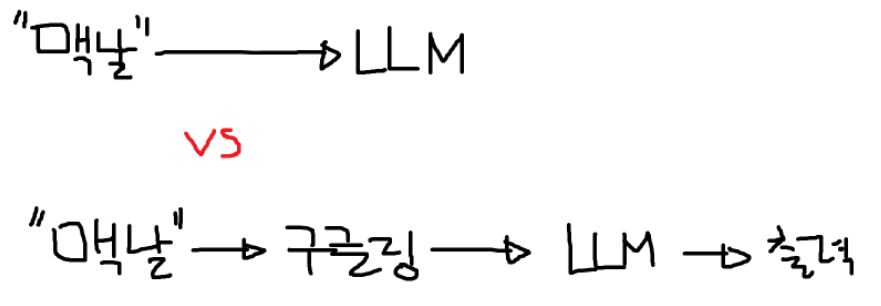

- 회사에서는 RAG를 필수적으로 사용합니다.
  - GPT는 회사만의 규율을 모르거든요.
  - 그 회사만 가지고 있는 기술문서도 있을 것이구요.
  - 그래서 대기업에서는 사내용 LLM 시스템에 RAG를 사용하곤 합니다.

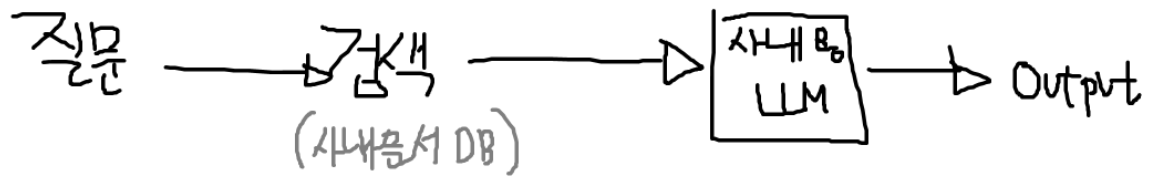

# 7. RAG 구현을 위한 준비!


- 먼저 사내문서들을 DB에 저장해두어야겠죠?
- 사내문서를 DB에 저장할때 두 가지 선택지가 있습니다.
  1. Text들을 그대로 DB에 저장해두기
      - 차후 검색시, 완벽히 동일한 단어 중심으로 검색을 하게 됩니다~!
  2. Text들을 임베딩해서 Text의 의미벡터값을 저장해두기
      - 차후 검색시, 의미가 유사한 단어 중심으로 검색을 하게 됩니다~!

<br/>

- RAG 기술을 구현할때는 둘 중 하나를 선택하면 됩니다!
  - 우리 실습에서는 임베딩해서, Text의 의미벡터값을 저장하겠습니다.
    - 이러면 정확한 단어를 입력하지 않아도, 검색이 더 잘될겁니다.

- 사내문서 Text를 그냥 DB에 저장하지 않고, 임베딩 벡터로 저장하겠습니다.
- 그러면 다음과 같은 준비물이 필요합니다.
  1. 사내문서 Text
  2. Text를 임베딩하여 의미공간의 벡터값으로 변경할 "임베딩 모델"
  3. 마지막으로 임베딩 값을 저장할 "DB"
  4. Cos 유사도가 높은 단어가 있는 문서를 검색해주는 "Retriever" Library

- 생각보다 준비물이 많아요.

# 8. RAG 동작 과정 이해하기


- 아래 이미지를 보면 다음과 같은 과정으로 진행됩니다.
  - 준비 단계
    - 1. 사내 문서 Text로 추출하여, "Chunk" 라는 단락 단위로 나눕니다.
    - 2. "Chunk" 를 임베딩모델의 입력값으로 넣어, 벡터로 만들고 만듭니다.
    - 3. 벡터를 DB에 저장합니다.
  - Workflow 동작
    - 4. 질문 프롬프트를 입력 받습니다.
    - 5. 임베딩 모델을 거쳐 벡터 값을 얻어낸 후, Retriever로 유사한 Chunk를 검색합니다.
    - 6. 기존 질문과, 검색결과를 합쳐 프롬프트를 완성합니다.
    - 7. 프롬프트를 LLM에 입력으로 넣습니다.
    - 8. 더 멋진 결과가 나옵니다.

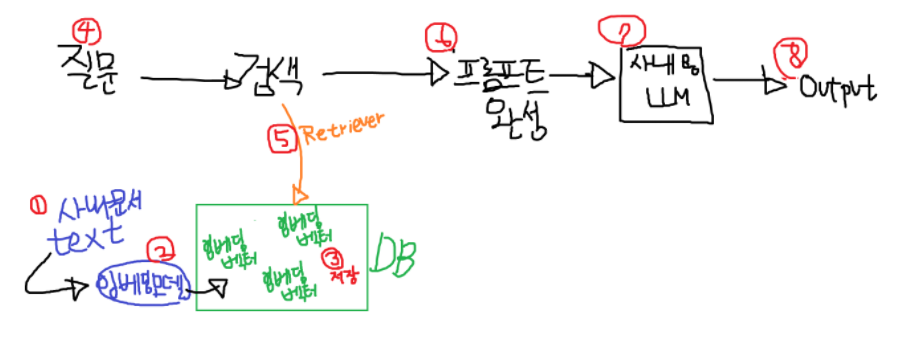

### RAG에 대한 Q&A
- Q. DB는 뭘 쓰나요?
- A. Vector 저장과 빠른 검색을 위한 Vector DB가 존재합니다. (Chroma, FAISS 등) <br/>
     그런데 그냥 MySQL을 써도 됩니다. MySQL 9.0 부터는 Vector도 지원되거든요.

<br/>

- Q. 왜 문서를 Chunk 단위로 쪼개나요?
- A. LLM이 거대한 문서 입력을 못받아들여서요.

<br/>

- Q. 문서 내용을 Chunk단위로 나눈다고 했는데, 몇 글자 정도로 나누나요?
- A. 보통 300 ~ 1000 토큰정도면 됩니다. 이정도면 LLM도 부담없고, 검색에 필요한 정보는 충분히 담길꺼예요. <br/>
   (한글 문장 수로 보면 한 20문장 정도)

<br/>

- Q. Chunk 단위로 자르면, 정보가 중간에 짤리는 것 아니예요?
- A. 네 맞습니다. 그래서 겹치는 구간(Overlap)을 두면서 Chunk로 자릅니다.

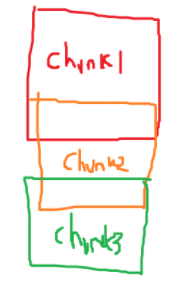

# 9. RAG 준비 단계

### Library 설치, 임베딩 모델을 위한 Upstage KEY 준비

- 실습에 필요한 Library를 먼저 설치합니다.
  - 임베딩모델은 한글 지역화가 잘되어있는 upstage 모델을 사용합니다.
  - vector DB는 chromadb를 사용합니다.

- 패키지들을 설치합니다.
  - langchain-upstage는 랭체인에서 업스테이지 llm을 쓸 수 있게 만들어진 어댑터 Library 입니다.
    - 이걸 설치하고 버전 충돌 에러메세지가 나온다면 무시해도 됩니다.
      - 아래 명령어를 수행하면, 기존 tokenizers 를 삭제하고, 낮은 버전의 tokenizers를 설치하게 됩니다.
      - 그러면 기존 transformer library 버전과 안맞다고 에러가 나는데, 무시해도 괜찮습니다.
  - langchain_community
    - 랭체인에서 자주사용되는 모듈들이 있습니다.
    - Text 파일을 불러오는데 사용되는 Loader, Vector DB와 연동해주는 모듈 등이 있습니다.
  - chromadb
    - 실습에 사용할 Vector DB 입니다.
    - vector값들을 저장하고, vector값을 검색해주는 검색기를 제공합니다.

In [ ]:
# 실습에 필요한 라이브러리들을 설치합니다.
!pip install langchain-upstage langchain_community chromadb

### Upstage API 키 준비하기

- 환경변수에 Upstage API키를 등록합니다.
  - 이 키는 Upstage의 임베딩모델, LLM 모델을 사용되는데 쓰입니다.
  - 환경변수에 등록 후, 올바르게 입력되었는지 테스트합니다.

In [ ]:
from langchain_upstage import UpstageEmbeddings
import os, getpass

os.environ["UPSTAGE_API_KEY"] = getpass.getpass("여기에 UpStage API 키를 입력하시오: ")
print('환경변수에 UpStage API키를 등록하였습니다.')

# API KEY가 올바른지 테스트 코드
ret = UpstageEmbeddings(model="embedding-query", api_key=os.environ["UPSTAGE_API_KEY"]).embed_documents("TEST")

### Text 준비하기

- 아래 코드를 수행하면, shipping_policy.txt 파일로 저장됩니다.
  

In [ ]:
# 예시로 사용할 '배송 정책' 문서를 만듭니다.
%%writefile shipping_policy.txt

========================
AI 온라인 서점 배송 정책
========================
[일반 배송]
평일 오후 3시 이전 주문 시 당일 발송됩니다.
오후 3시 이후 주문 건은 익일 발송됩니다.
주말 및 공휴일은 배송이 어렵습니다.
도서 산간 지역 배송
제주 및 도서 산간 지역은 추가 배송비 3,000원이 발생할 수 있습니다.

[배송 조회]
배송 관련 문의는 고객센터(1588-0000)로 연락 주시기 바랍니다.

==============
배송 파손 정책
==============
상품이 배송 중 파손된 경우, 즉시 새 상품으로 교환해드립니다.
제품 이상이 확인되면 왕복 배송비는 전액 당사 부담입니다.
수령 후 7일 이내에 고객센터로 연락해 주셔야 합니다.
파손된 상품과 포장 상태 사진을 함께 제출해 주세요.
확인 후, 새 상품을 발송하거나 환불 절차를 진행합니다.
단순 변심이나 부주의로 인한 손상은 교환 대상이 아닙니다.


- 아래와 같이 문서가 만들어졌습니다.

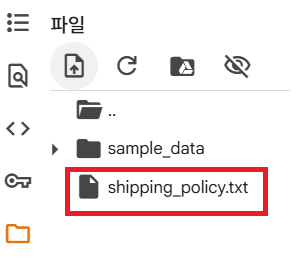

# 문서를 Chunk 단위로 분할하기

- 다음 코드를 수행하여 Chunk 단위로 분할합니다.

In [ ]:
from langchain_community.document_loaders.text import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 1. Load: 텍스트 파일 불러오기
loader = TextLoader("./shipping_policy.txt", encoding="utf-8")
documents = loader.load()
print("--- 원본 문서 ---")
print(documents[0].page_content)

# 2. Split: 문서를 200자 단위로 자르기 (엔터 단위, 40자씩 겹치게)
# chunk_size=200, chunk_overlap=40 *
text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=40)
chunks = text_splitter.split_documents(documents)

print("\n--- 200자 단위로 잘린 문서 조각(Chunk)들 ---")
for i, chunk in enumerate(chunks):
    print(f"[Chunk {i+1}]")
    print(chunk.page_content)
    print()
    print()

### Chunk를 임베딩 벡터로 변환 후 Vector DB에 저장하기
  - vector DB는 chromaDB를 사용합니다.
    - chromaDB는 내부적으로 SQLite 기반으로 구현되어있습니다.
    - 아래 코드를 수행하면 "./chroma_store"라는 폴더가 생성됩니다. 이곳에 저장됩니다.
  - 임베딩 모델은 Upstage 모델을 사용합니다.

In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_upstage import UpstageEmbeddings

# 텍스트를 숫자 벡터로 변환해주는 '임베딩 모델'을 준비합니다.
embeddings = UpstageEmbeddings(model="embedding-query", api_key=os.environ["UPSTAGE_API_KEY"])

# 잘라낸 문서 조각(chunks)들을 임베딩하여 Vector DB에 저장합니다.
vector_store = Chroma.from_documents(documents=chunks, embedding=embeddings, persist_directory="./chroma_store")

print("Chunk들을 Vector DB에 저장 완료")

### 검색기(Retriever) 테스트
- chromaDB는 retriever도 제공합니다.
- Vector Store 객체가 질문과 관련된 정보를 잘 찾아주는지 테스트해볼까요?

In [ ]:
retriever = vector_store.as_retriever()

question = "주말에도 배송해주나요?"

# retriever.invoke(질문) 을 실행하면, 질문과 가장 관련 높은 문서 조각을 찾아줍니다.
# question을 임베딩벡터로 변환 후 검색을 시작합니다.
retrieved_docs = retriever.invoke(question)

print(f"[질문]: {question}")
print(f"\n[검색 결과]:\n{retrieved_docs[0].page_content}")

# 10. RAG Workflow!


### 동작 원리

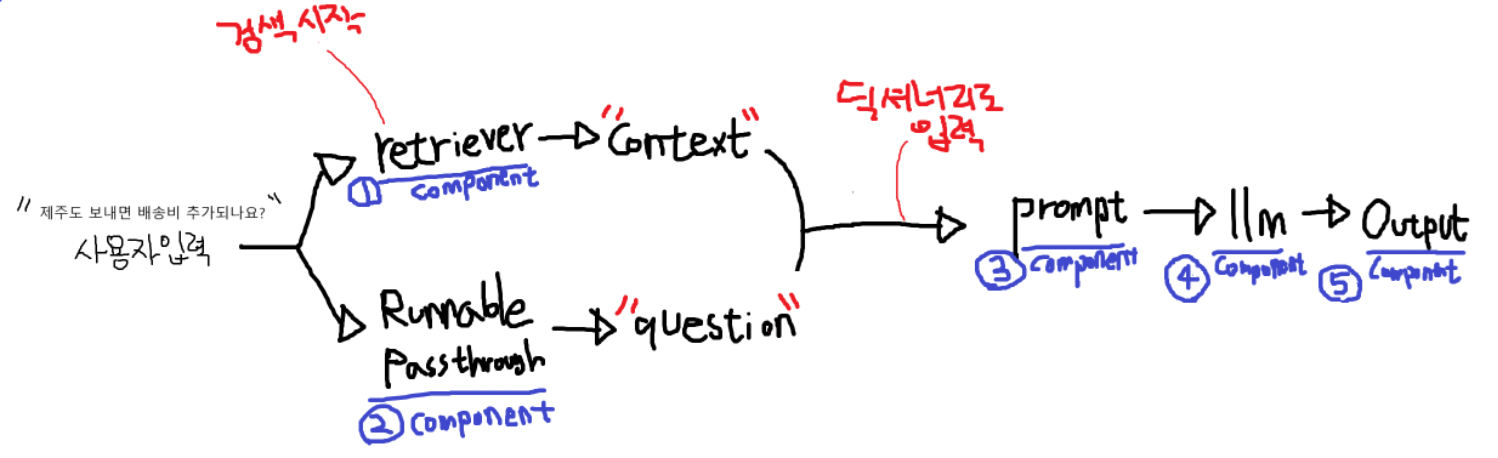

1. 사용자 입력이 두 곳으로 전달됩니다.
      - retriever와 RunnablePassthrough 라는 컴포넌트로 입력이 들어갑니다.
      - retriever에서는 입력 받은 내용을 검색해서, 찾아낸 정보를 "context"에 담습니다.
      - RunnablePassthrough는 입력받는 내용을 그대로 출력에 전달만합니다. (ㅎㅎ)

<br/>

2. prompt에 전달되면 프롬프트를 완성합니다. (prompt 컴포넌트)
      - 이 프롬프트에는 검색결과 내용과, 사용자 입력내용이 모두 포함되어있습니다.

<br/>

3. LLM 동작 (llm 컴포넌트)

<br/>

4. 출력 (StrOutParser 컴포넌트)


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_upstage import ChatUpstage

# LLM 모델을 준비합니다.
llm = ChatUpstage(model="solar-pro2", api_key=os.environ["UPSTAGE_API_KEY"])

# LLM에게 어떤 역할을 할지 알려주는 프롬프트(지시서)를 만듭니다.
prompt = ChatPromptTemplate.from_messages([
    ("system", "당신은 AI 온라인 서점의 친절한 고객 서비스 담당자입니다. 주어진 정보를 바탕으로 사용자의 질문에 답변해주세요."),
    ("user", "[질문]: {question}\n\n[참고 정보]: {context}"),
])

# RAG 체인(Chain)을 만듭니다.
rag_chain = (
    {
      "context": retriever, # 컴포넌트 1 : 전달받은 입력값(question_input1, 2)을 vector db에 검색 후 검색결과를 반환
      "question": RunnablePassthrough(), # 컴포넌트 2 : 전달받은 입력값(question_input1, 2)을 그대로 반환
    }
    | prompt # 컴포넌트 3 : {context, question} 딕셔너리가 입력되면, 완성된 프롬프트를 반환
    | llm # 컴포넌트 4 : 완성된 프롬프트를 LLM에 전달, 완성된 프롬프트를 반환
    | StrOutputParser() # 컴포넌트 5. LLM이 반환한 정보 중, Text 답변만 문자열로 반환
)

print("RAG 체인 준비 완료!")
print("----------------------------")
print()
print()

# RAG 체인에 질문을 던져봅니다.
question_input1 = "주말 배송에 대해 알려주세요."
answer1 = rag_chain.invoke(question_input1)
print(f"[질문 1]: {question_input1}")
print(f"[답변 1]: {answer1}")

print()
print()
print("----------------------------")
print()
print()

question_input2 = "제주도로 보내면 배송비가 추가되나요?"
answer2 = rag_chain.invoke(question_input2)
print(f"[질문 2]: {question_input2}")
print(f"[답변 2]: {answer2}")

# 11. 끝으로
  - AI Workflow 개념에 대해 알아봤습니다!
  - Langchain은 LLM에 Workflow가 필요한 경우, 유용하게 사용할 수 있는 툴입니다.
  - 특히 RAG 같이 조금 복잡한 Workflow도 간결한 코드로 구현 가능합니다!

<br/>

**[참고사항]**
  - 아직 Langchain 수업이 끝나지 않았습니다!!
    - 다음 수업에는 Langchain이 직접 Tool을 사용하는 방법을 소개합니다.
    - 다음 수업에는 Langchain이 이전 대화이력을 기억하는 방법도 소개합니다
    
  - Upstage 실습자료에서는 이를 선행하여, Tool을 사용을 위한 준비과정을 소개합니다.
    - Tool을 사용하는 방법은 다음 수업에서 본격적으로 다룹니다.
    - 다음 수업에서 자세히 다루니 참고만 해주시면 됩니다.

<br/>

### Easy 자료 (강사님 자료)
- AI를 처음 공부하는 분들을 위해 만들어져있습니다.
- 내용을 모두 이해해야합니다! **강사님의 도움을 적극적으로 받아주세요.**

### 실습 / 과제 자료 (업스테이지 자료)
- AI를 공부해본 경험자 위주로 만들어져있습니다.
- 퍼즐조각을 모은다는 생각으로 공부해주세요!. **GPT의 도움을 적극적으로 받아주세요.**

### 교수님 강의
- 국내 최고의 AI 교수님들의 강의가 시작됩니다.
- 최대한 내용을 이해해봅시다.
  